In [1]:
# CSS style setting
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

# Prepare data

## Import Toolkits

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay , classification_report

In [3]:
tumor_df = pd.read_csv('/kaggle/input/knn-data/knndata.csv')
tumor_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Explore

In [4]:
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

we have no null values , and columns are float64 except the target "diagnosis" is object
let`s check if there a duplicate data

In [5]:
tumor_df.duplicated().sum()
#beautiful! we have no duplicated values.

0

In [6]:
tumor_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Now we will drop the unneeded columns such as ["id" , "Unnamed: 32"] then show the distrbution of the features

In [7]:
tumor_df.drop(columns= ["id" , "Unnamed: 32"], inplace = True)
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
diagonises_freq = tumor_df['diagnosis'].value_counts(normalize= True).reset_index(name = 'Frequency')
diagonises_freq

,diagnosis,Frequency
0,B,0.627417
1,M,0.372583


In [9]:
fig = px.bar(data_frame= diagonises_freq , x= 'diagnosis' , y= 'Frequency')
fig.update_layout(title= "Frequency of Diagonises" , xaxis_title = 'Diagonises' , yaxis_title= 'Frequency')
fig.show();

In [10]:
num_features = tumor_df.select_dtypes(exclude= 'object')
num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


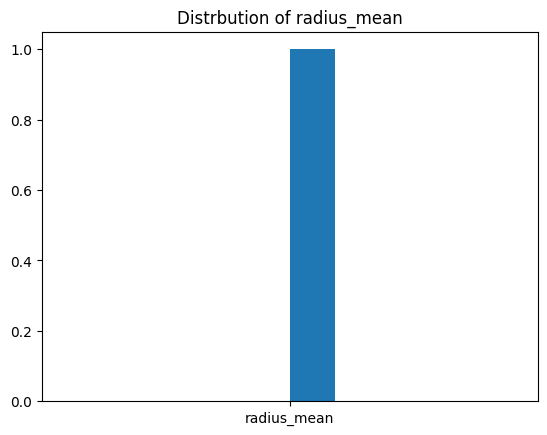

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


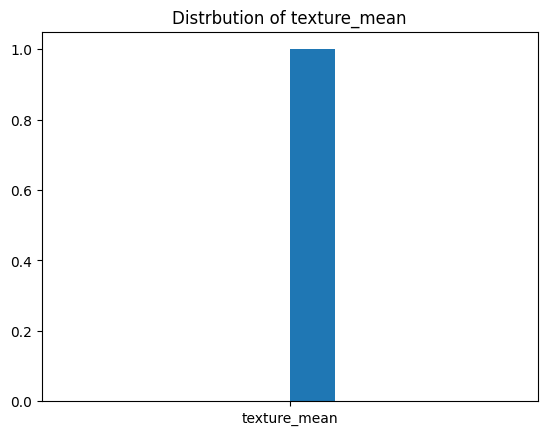

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


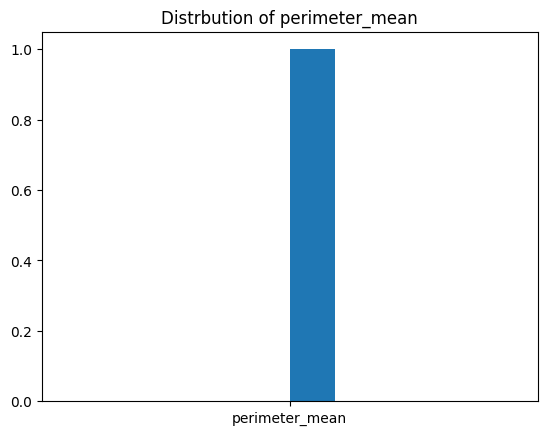

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


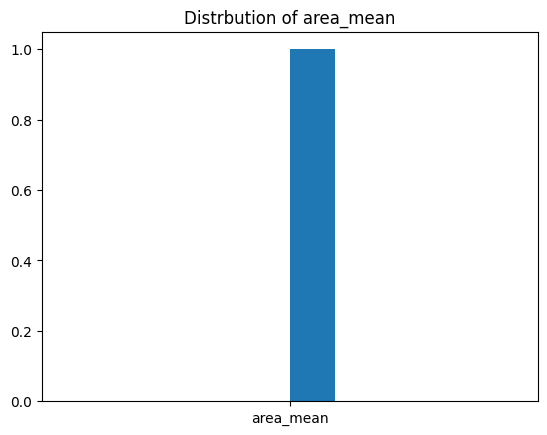

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


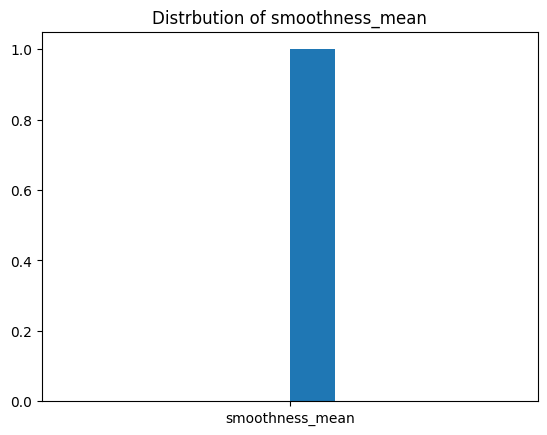

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


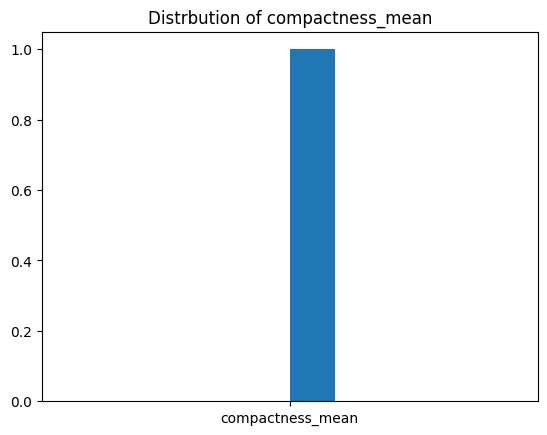

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


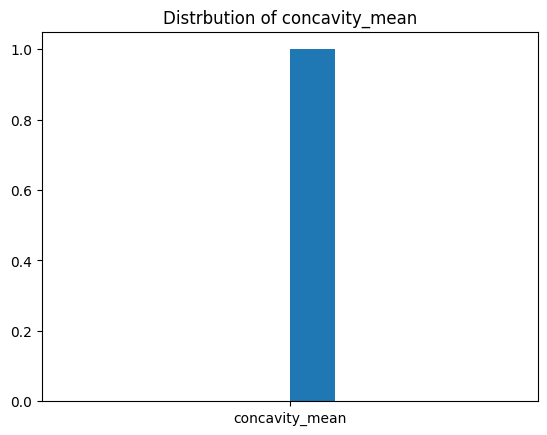

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


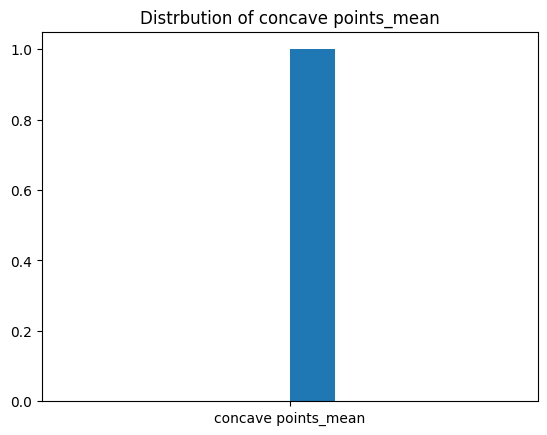

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


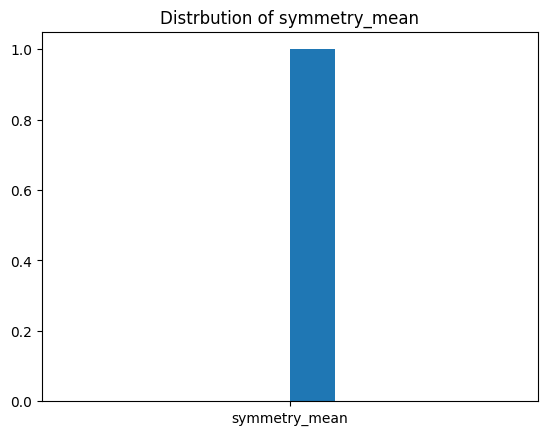

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


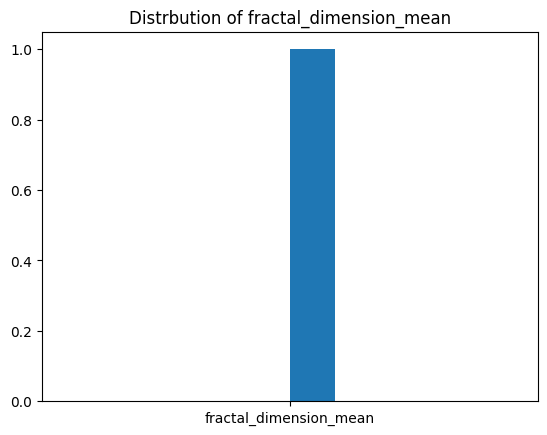

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


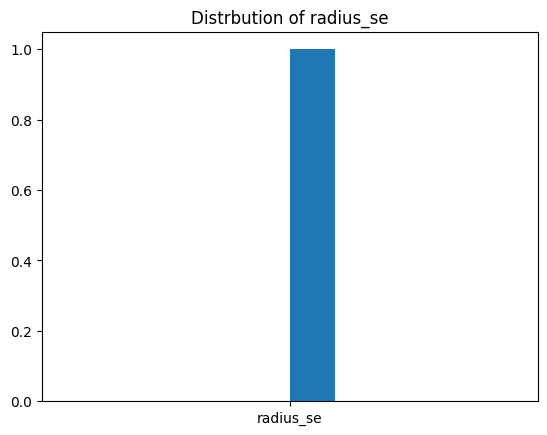

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


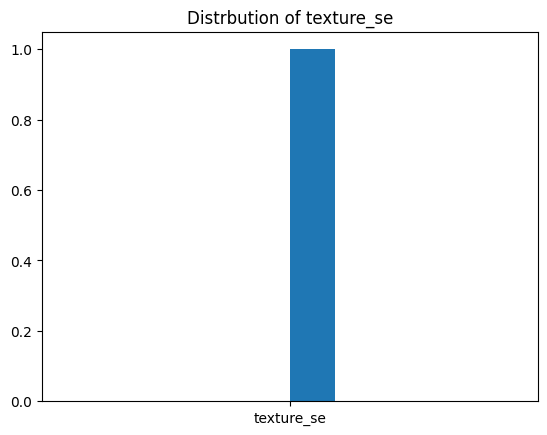

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


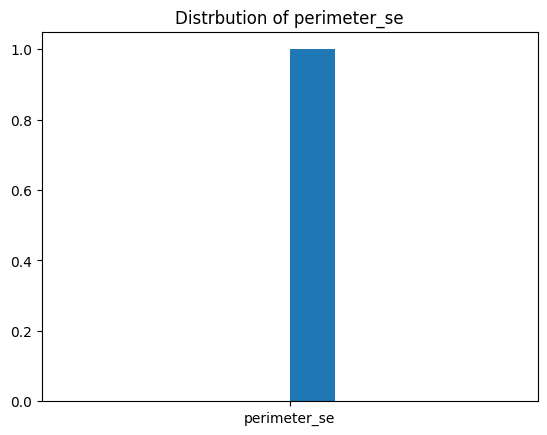

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


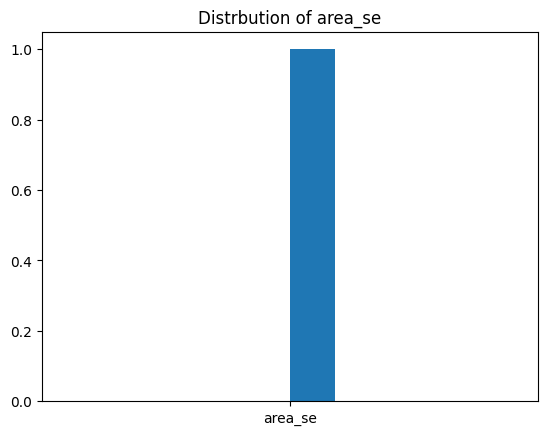

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


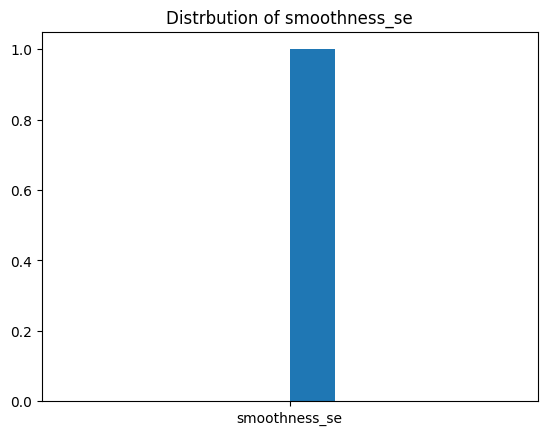

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


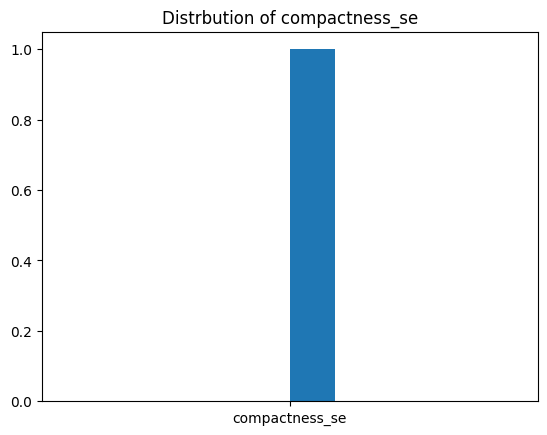

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


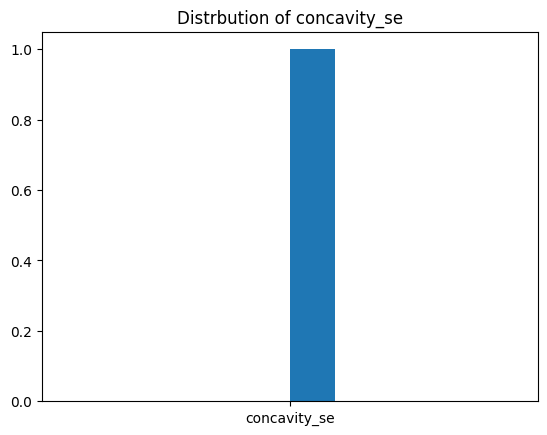

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


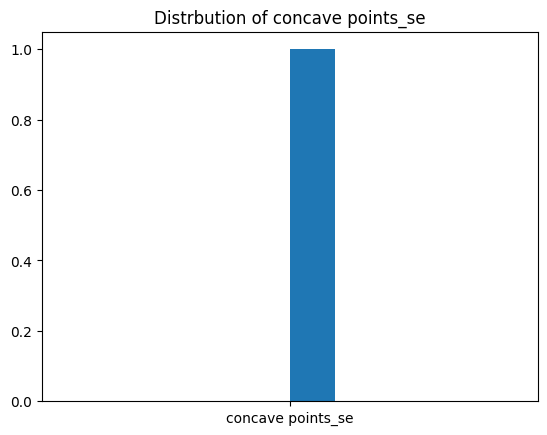

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


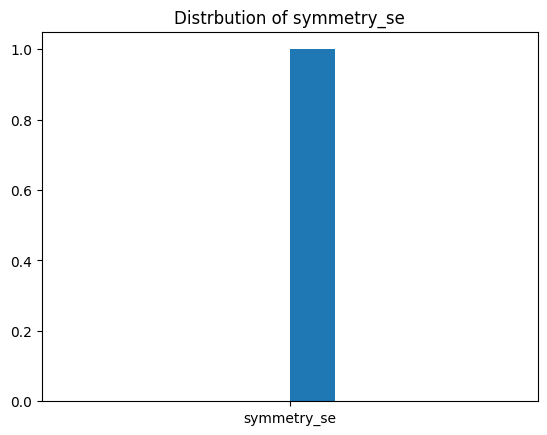

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


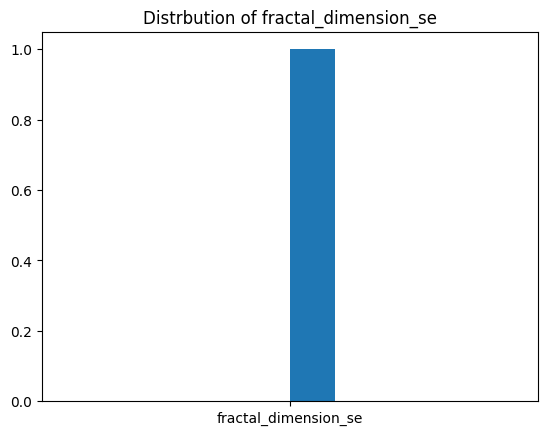

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


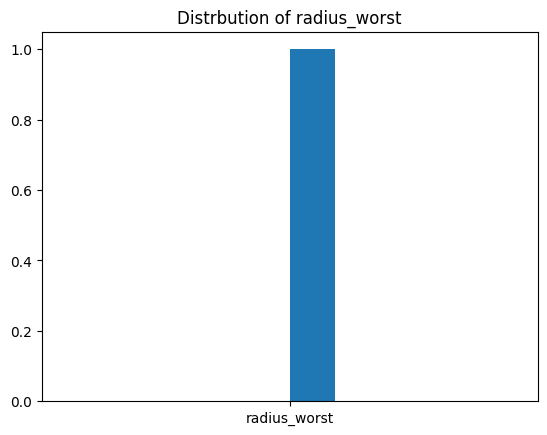

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


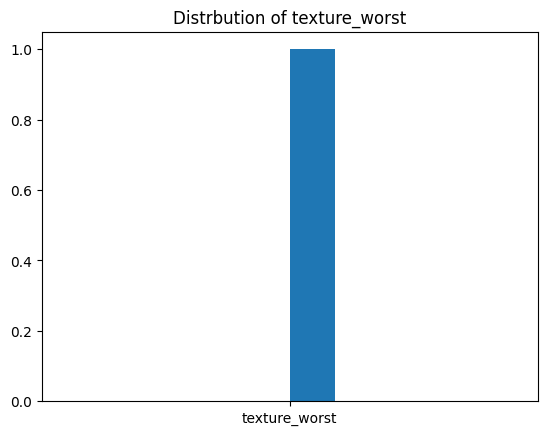

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


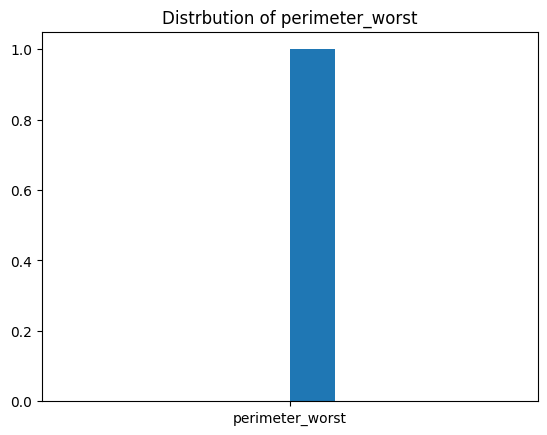

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


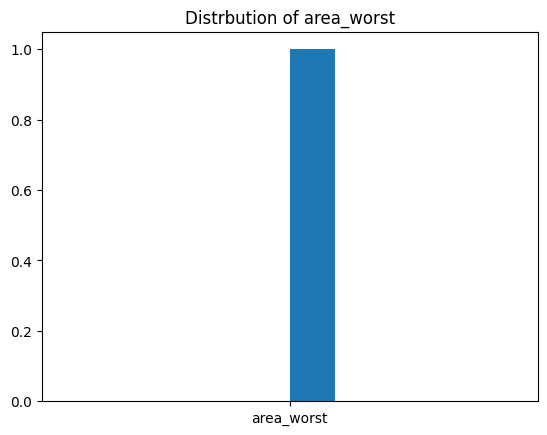

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


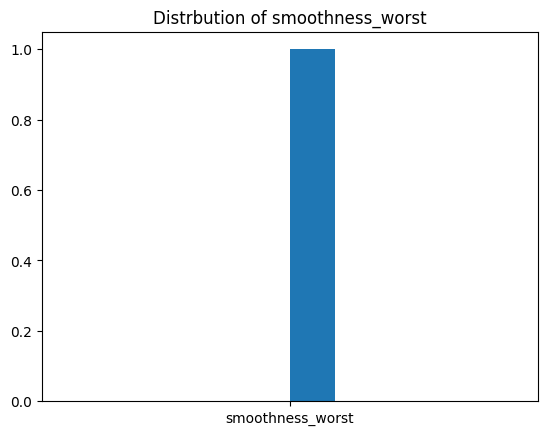

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


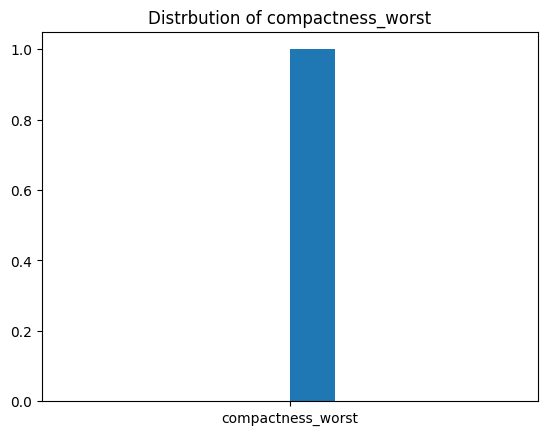

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


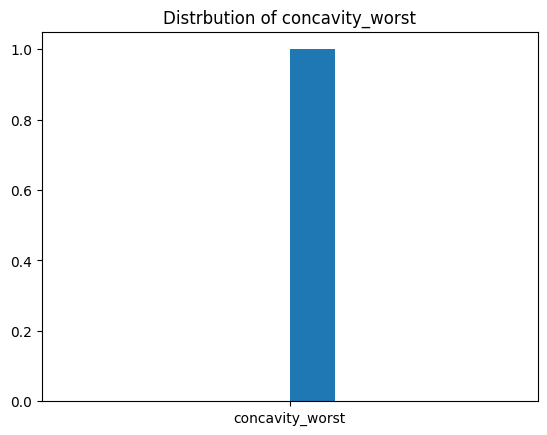

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


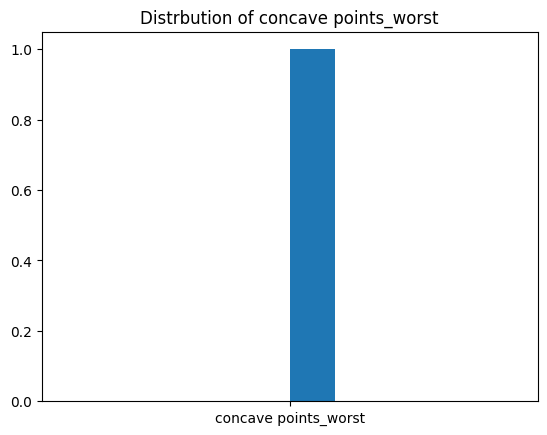

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


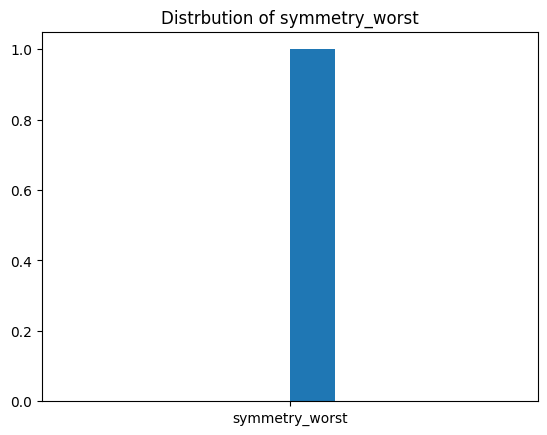

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]), <BarContainer object of 10 artists>)


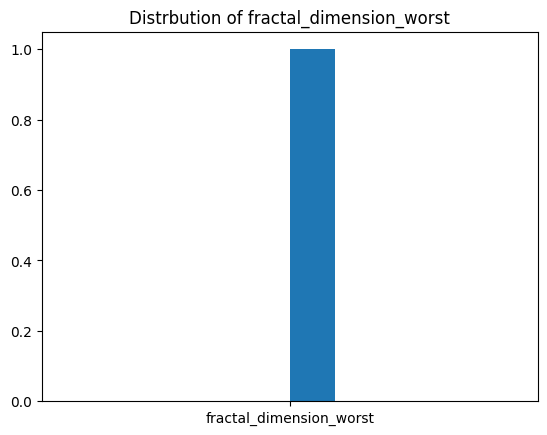

In [11]:
for i in num_features:
    print(plt.hist(i))
    plt.title(f'Distrbution of {i}')
    plt.show();

it`s a pretty normal distrbutions

Do you think about outliers? let`s check it out

Axes(0.125,0.11;0.775x0.77)


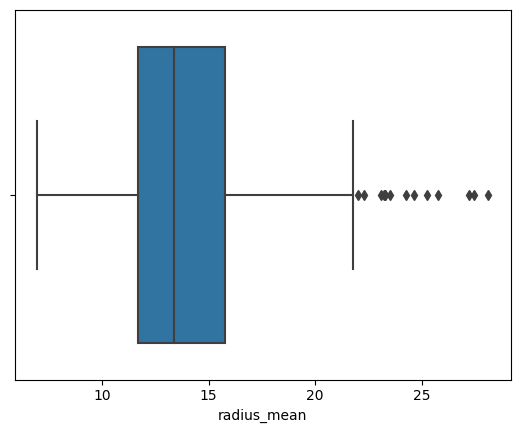

Axes(0.125,0.11;0.775x0.77)


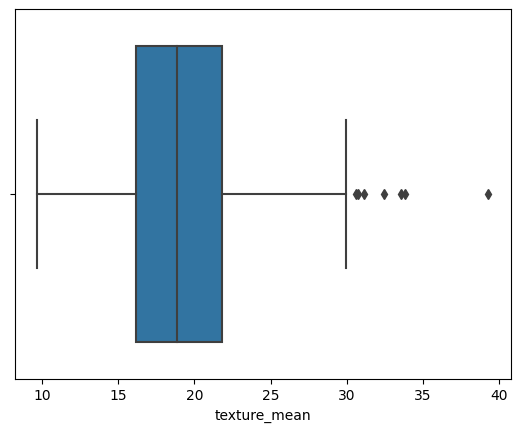

Axes(0.125,0.11;0.775x0.77)


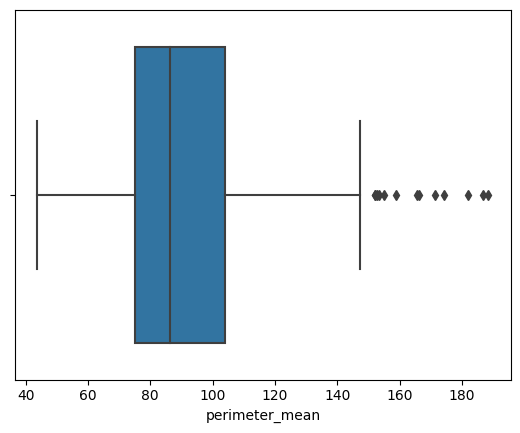

Axes(0.125,0.11;0.775x0.77)


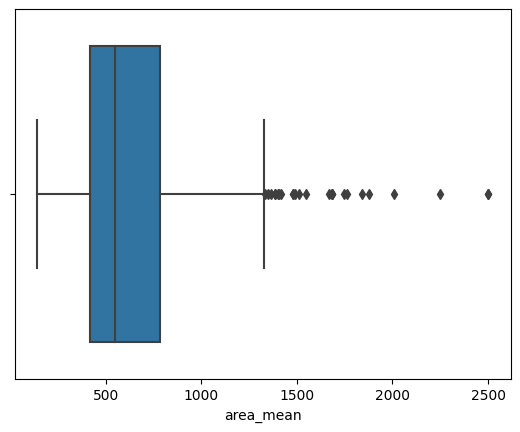

Axes(0.125,0.11;0.775x0.77)


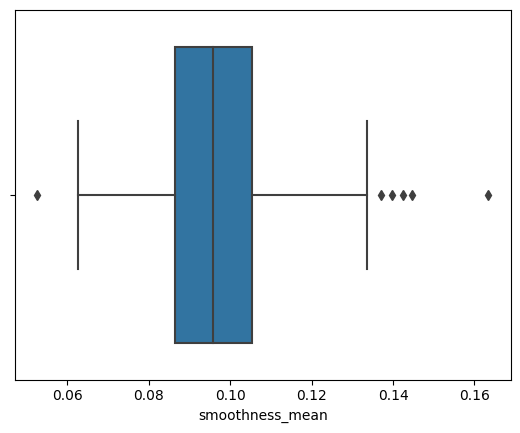

Axes(0.125,0.11;0.775x0.77)


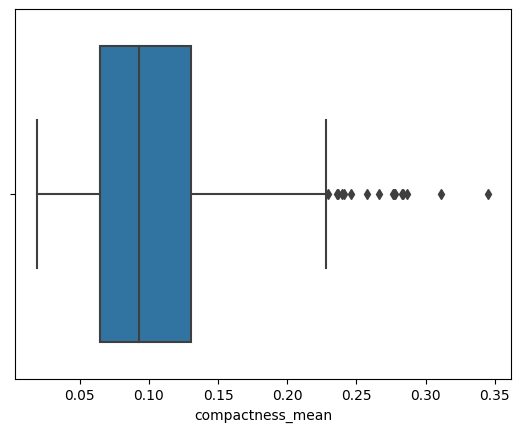

Axes(0.125,0.11;0.775x0.77)


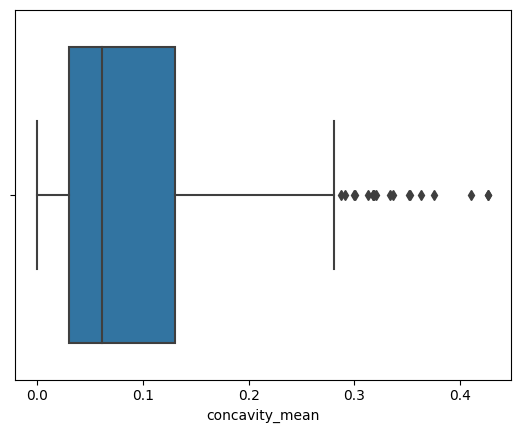

Axes(0.125,0.11;0.775x0.77)


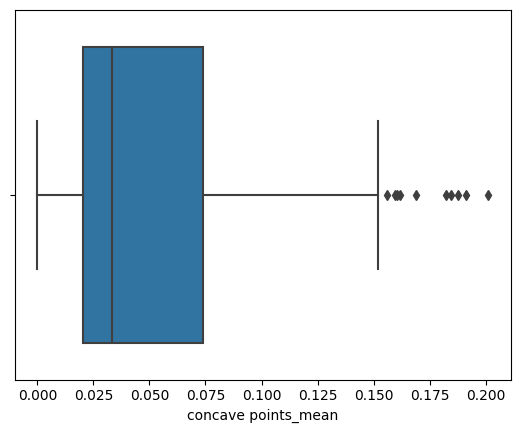

Axes(0.125,0.11;0.775x0.77)


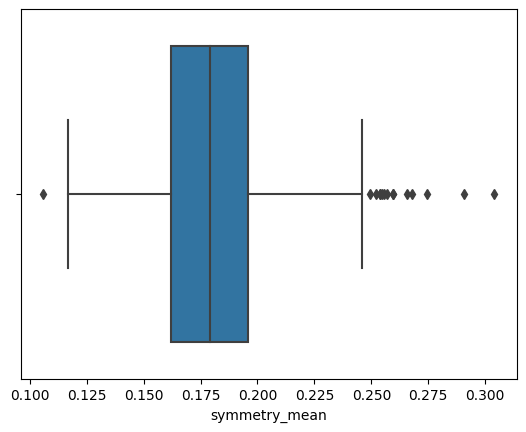

Axes(0.125,0.11;0.775x0.77)


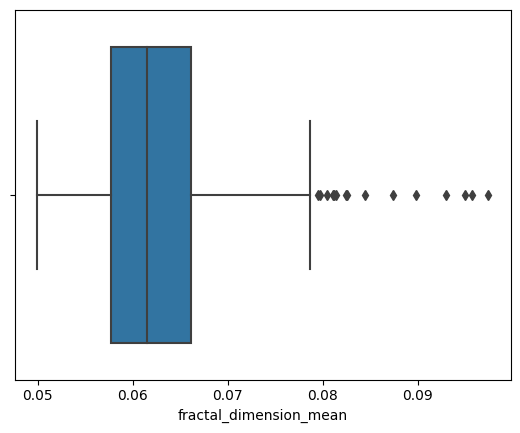

Axes(0.125,0.11;0.775x0.77)


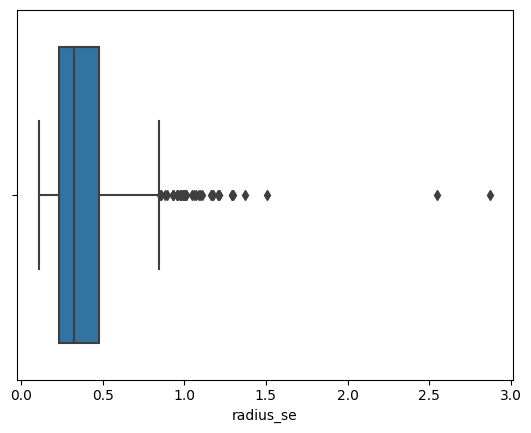

Axes(0.125,0.11;0.775x0.77)


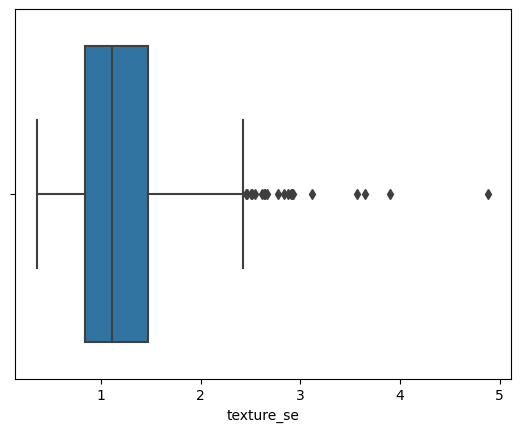

Axes(0.125,0.11;0.775x0.77)


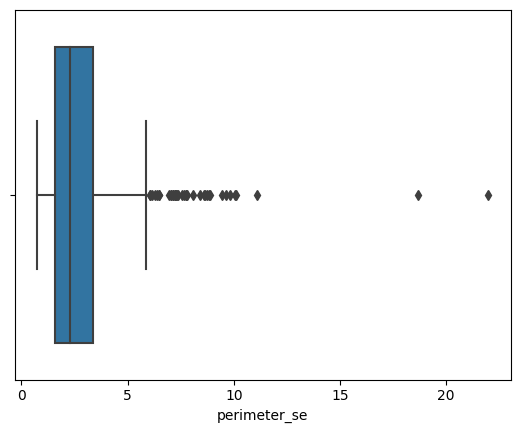

Axes(0.125,0.11;0.775x0.77)


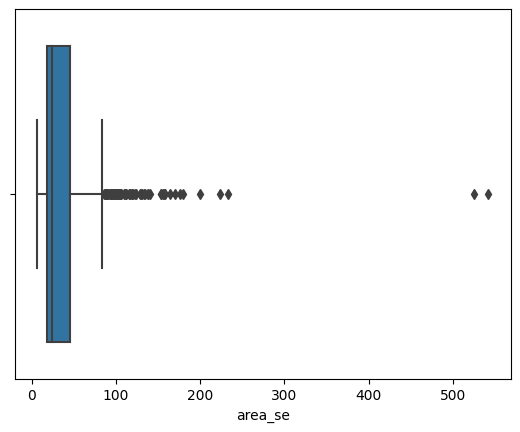

Axes(0.125,0.11;0.775x0.77)


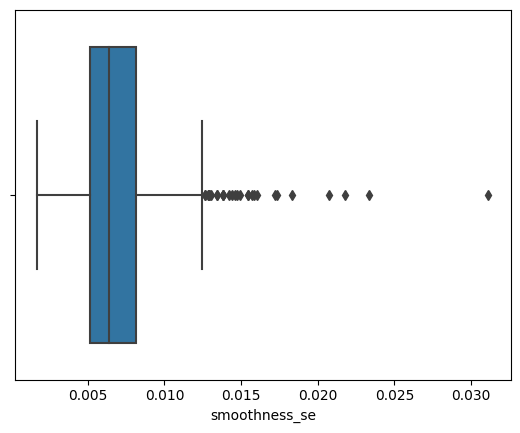

Axes(0.125,0.11;0.775x0.77)


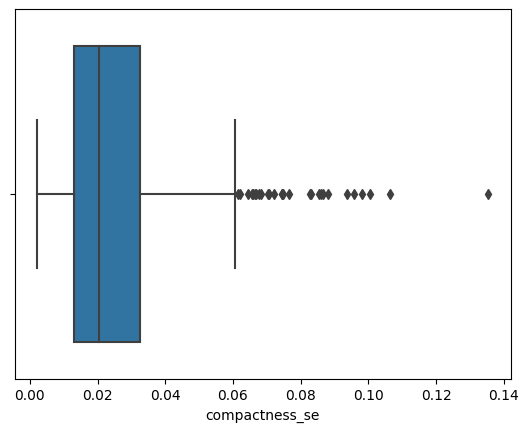

Axes(0.125,0.11;0.775x0.77)


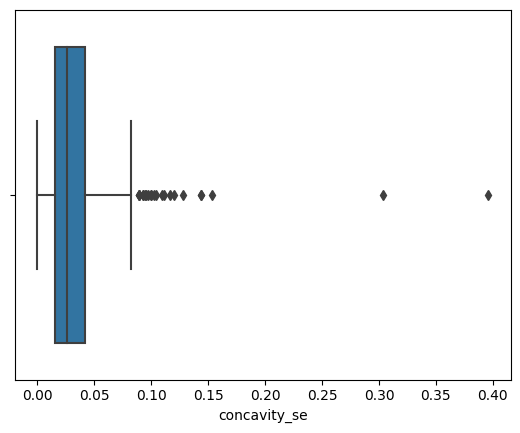

Axes(0.125,0.11;0.775x0.77)


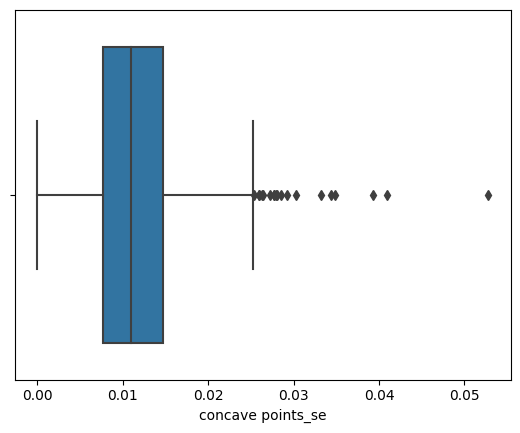

Axes(0.125,0.11;0.775x0.77)


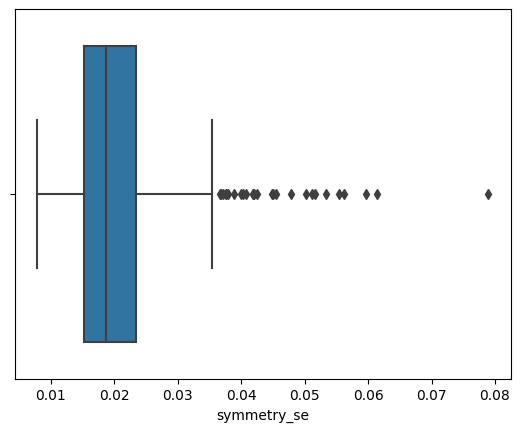

Axes(0.125,0.11;0.775x0.77)


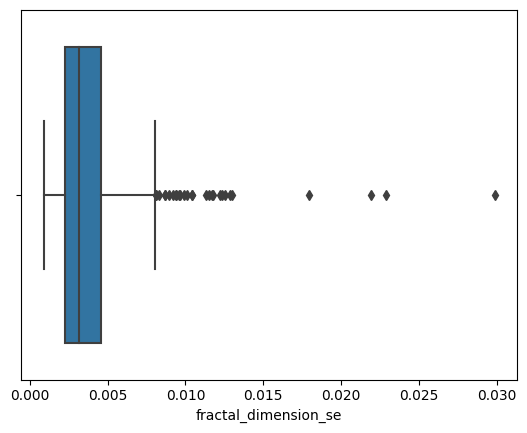

Axes(0.125,0.11;0.775x0.77)


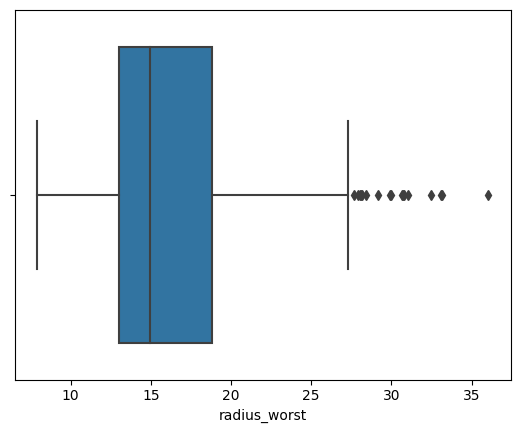

Axes(0.125,0.11;0.775x0.77)


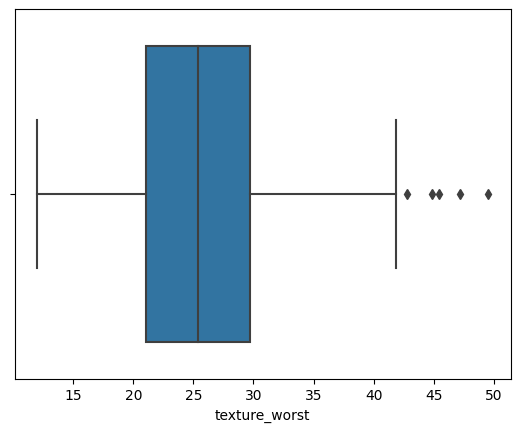

Axes(0.125,0.11;0.775x0.77)


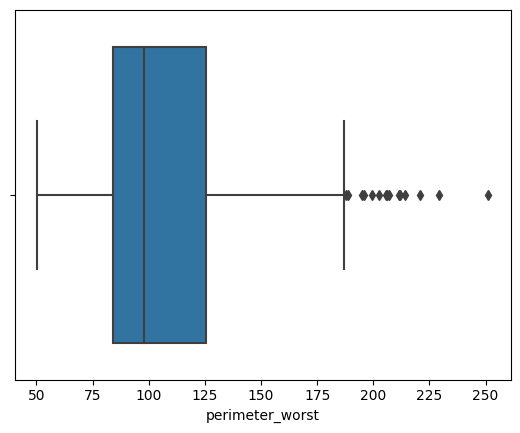

Axes(0.125,0.11;0.775x0.77)


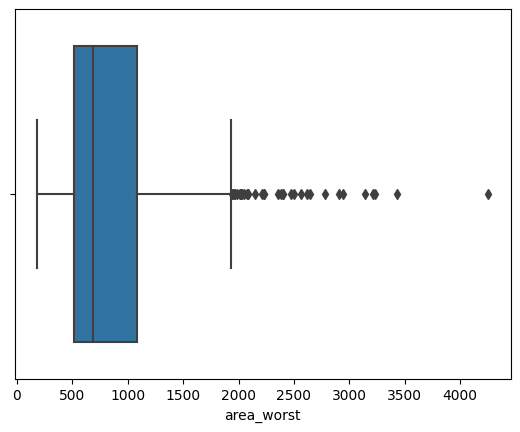

Axes(0.125,0.11;0.775x0.77)


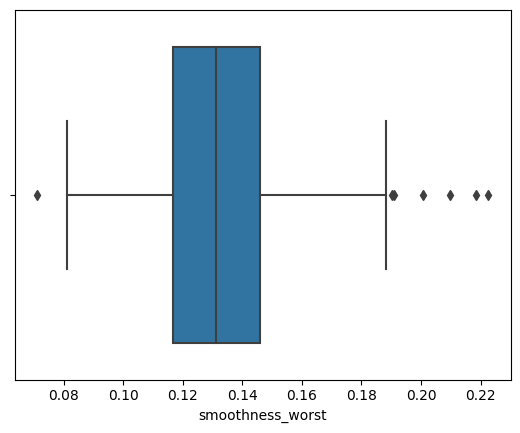

Axes(0.125,0.11;0.775x0.77)


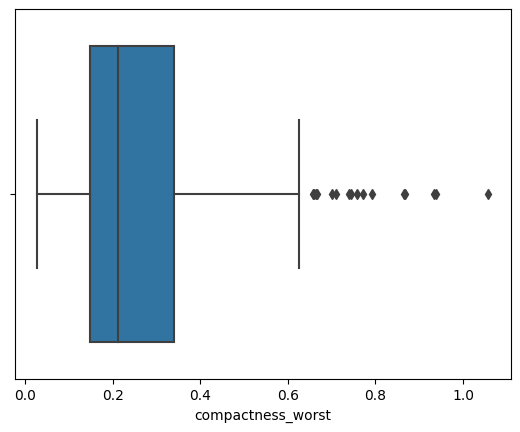

Axes(0.125,0.11;0.775x0.77)


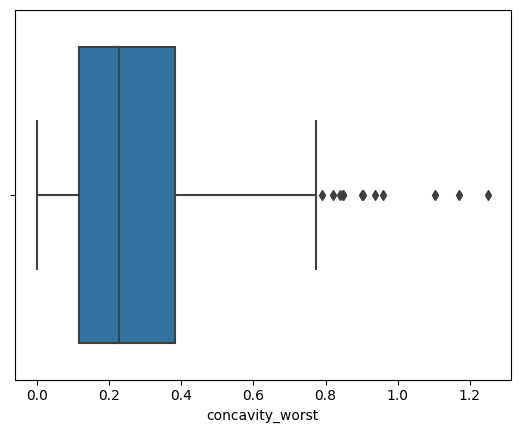

Axes(0.125,0.11;0.775x0.77)


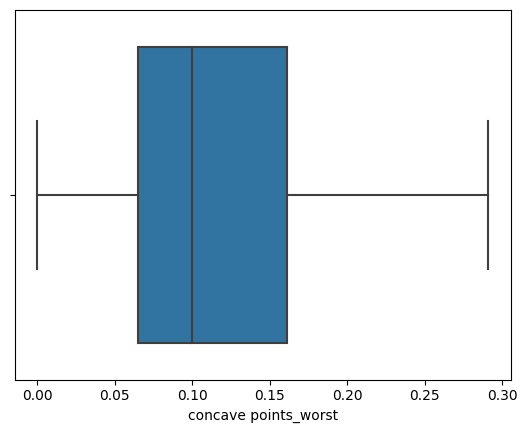

Axes(0.125,0.11;0.775x0.77)


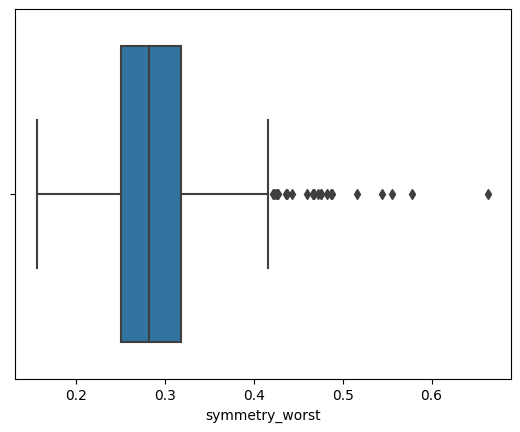

Axes(0.125,0.11;0.775x0.77)


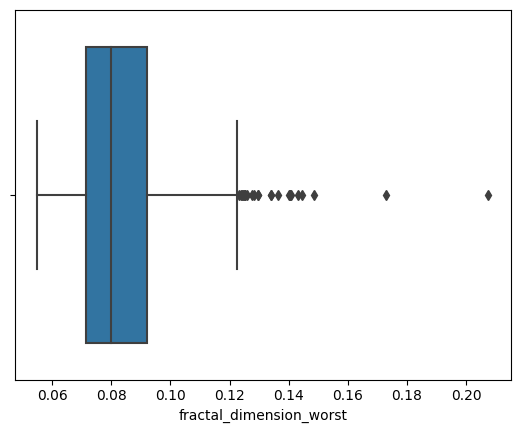

In [12]:
for i in num_features:
    print(sns.boxplot(data = num_features , x= i))
    plt.show();

we have outliers in some features, and it gives me a strong impression to use SVR model, let`s plot the headmap

* ### HeadMap

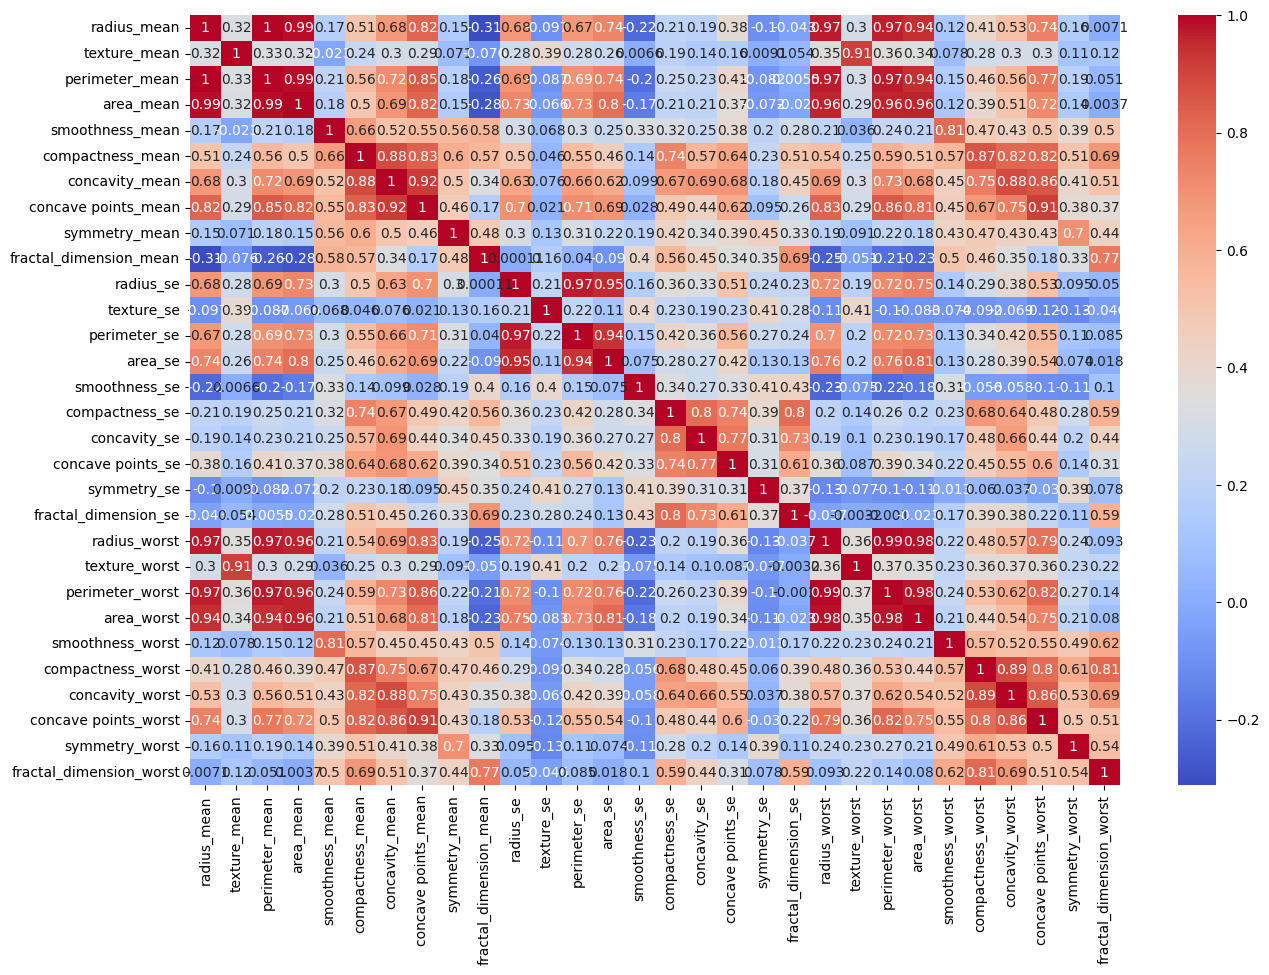

In [13]:
plt.figure(figsize= (15,10))
corr = num_features.corr()
sns.heatmap(corr , annot= True , cmap= 'coolwarm');

## Split

In [14]:
target = 'diagnosis'
y = tumor_df[target]
X = tumor_df.drop(target , axis= 1)
print("X shape", X.shape)
print("y shape", y.shape)

X shape (569, 30)
y shape (569,)


In [15]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state= 42)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape", y_train.shape)

X_train shape (455, 30)
X_test shape (114, 30)
y_train shape (455,)
y_test shape (455,)


# Build Model

## Baseline

In [16]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Accuracy Baseline", round(acc_baseline , 4))

Accuracy Baseline 0.6286


## Iterate

In [17]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [18]:
print("Training Accuracy", round(svc_model.score(X_train , y_train) , 3))
print("Test Accuracy", round(svc_model.score(X_test , y_test) , 3))

Training Accuracy 0.914
Test Accuracy 0.947


# Evaluate

## ConfusionMatrix & Classification Report

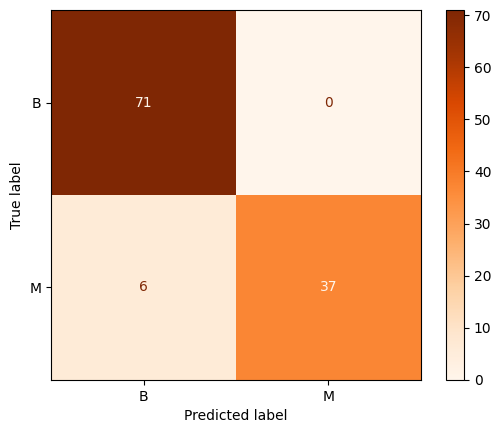

In [21]:
ConfusionMatrixDisplay.from_estimator(
    svc_model,
    X_test,
    y_test,
    cmap= 'Oranges'
);

In [20]:
print(classification_report(y_test , svc_model.predict(X_test)))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96        71
           M       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

